
# Project: Investigate a Dataset - No show Appointments May 2016

### This dataset collects information
From 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. A number of
characteristics about the patient are included in each row.

- ScheduledDay’ tells us on what day the pat
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare  program Bolsa Família.
- ‘No’ means that the patient showed up to their appointment, and ‘Yes’ means they did not show up.



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul> 

### Installation of Python, plus the following libraries: 

In [3]:
#import important Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
df = pd.read_csv(r"C:\Users\cryst\Downloads\noshowappointments.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning (Replace this with more specific notes!)

In [5]:
df.drop(['PatientId', 'AppointmentID'], axis = 1,inplace=True)

In [6]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [24]:
df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [25]:
df.drop([99832], inplace = True)

In [26]:
df.loc[df['Age'] == 115]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
63912,3.196320e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196320e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196320e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196320e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482350e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [27]:
df.drop([63912, 63915, 68127, 76284, 97666], inplace = True)

In [28]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474921e+14,5.675304e+06,37.085694,0.098271,0.197248,0.071869,0.030401,0.022213,0.321034
std,2.560928e+14,7.129576e+04,23.104606,0.297682,0.397923,0.258272,0.171690,0.161440,0.466876
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172460e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172600e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438960e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [29]:
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

In [36]:
print("Num of dublicated : ", + sum(df.duplicated()))

Num of dublicated :  0


In [37]:
print('Age:-> ',sorted(df.Age.unique()))
print('Gender:->',df.Gender.unique())
print('Diabetes:-> ',df.Diabetes.unique())
print('Alcoholism:-> ',df.Alcoholism.unique())
print('Hypertension:-> ',df.Hypertension.unique())#Hypertension
print('Handicap:-> ',df.Handicap.unique())#Handicap
print('Scholarship:-> ',df.Scholarship.unique())
print('SMS Received:-> ',df.SMS_received.unique())
print('No Show:-> ',df.No_show.unique())



Age:->  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102]
Gender:-> ['F' 'M']
Diabetes:->  [0 1]
Alcoholism:->  [0 1]
Hypertension:->  [1 0]
Handicap:->  [0 1 2 3 4]
Scholarship:->  [0 1]
SMS Received:->  [0 1]
No Show:->  ['No' 'Yes']


In [38]:
df[df["Age"] <= 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
59,7.184430e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366230e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885170e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718820e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647130e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314930e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822850e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326990e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468590e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No


In [39]:
meanAge = df['Age'].mean()
df[df['Age'] <= 0] = meanAge

> 0 = Showed up to appointment. 1 = did not show up to appointment 

In [40]:
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])

C:\Users\cryst\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\cryst\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
showed = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed


In [42]:
df.to_csv('noshowappointments-May-2016-cleaned.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


## Research Questions: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?



### What is the percentage of show-up vs. no show-up rate?

77.18442648908352


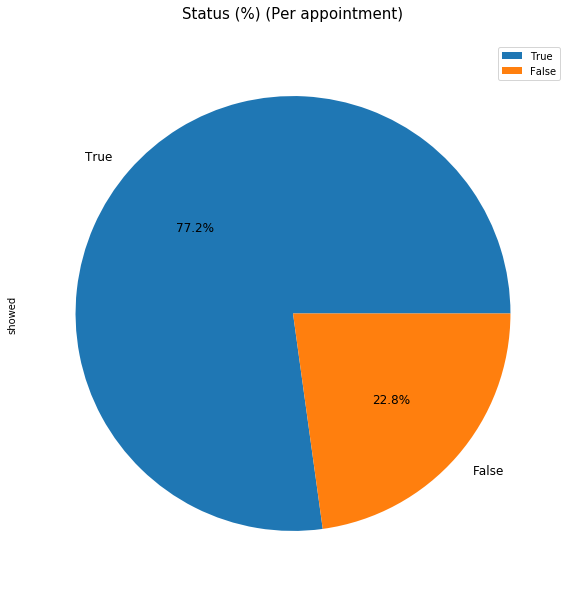

In [43]:
allP = df['showed'].value_counts()
print(allP[1] / allP.sum() * 100)
pieChart = allP.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
pieChart.set_title("Status" + ' (%) (Per appointment)\n', fontsize = 15);
plt.legend();

22.8% of people did not show up to the appt while 77.2% showed up to the appt. 

### Research Question 2 (what are the most feature that matter the most of ('Age', 'being alcoholic','Having an SMS', 'Gender', 'Scholarship'), to make the patient make it to his appiontment?)

In [44]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,showed,not_showed
0,2.987250e+13,5642903.0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True,False
1,5.589980e+14,5642503.0,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
2,4.262960e+12,5642549.0,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
3,8.679510e+11,5642828.0,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
4,8.841190e+12,5642494.0,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0.0,True,False


#### print the average age of people who show up and people who didn't

In [45]:
df.Age[showed].mean()

39.07340718597972

In [46]:
df.Age[not_showed].mean()

35.318125201826824

Histogram of people who showed and not_showed 

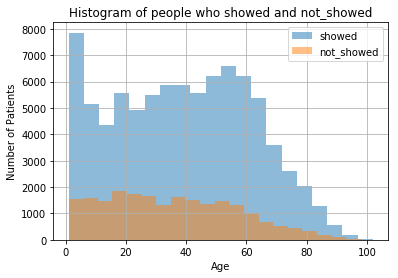

In [58]:
df.Age[showed].hist(alpha=0.5, bins=20, label='showed')
df.Age[not_showed].hist(alpha=0.5, bins=20, label='not_showed');
plt.title('Histogram of people who showed and not_showed')
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.legend()

####  making an histogram to see the realtion between the (age,alcoholic people, SMS recievers, Gender, Scholarship) and the people who came to thier appointment

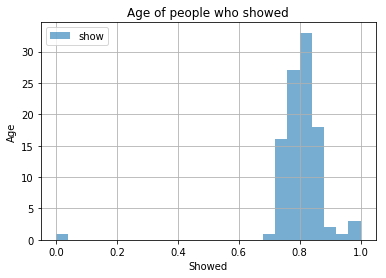

In [49]:
# using group by function to find relations between features 
# visualize the average of people who came + print the percentage

df.groupby('Age')['showed'].mean().hist(alpha=0.6,bins=25,label='show');
plt.xlabel("Showed")
plt.ylabel("Age")
plt.title("Age of people who showed")
plt.legend()

Alcoholism
0.000000     0.797340
1.000000     0.798512
37.085694    0.000000
Name: showed, dtype: float64


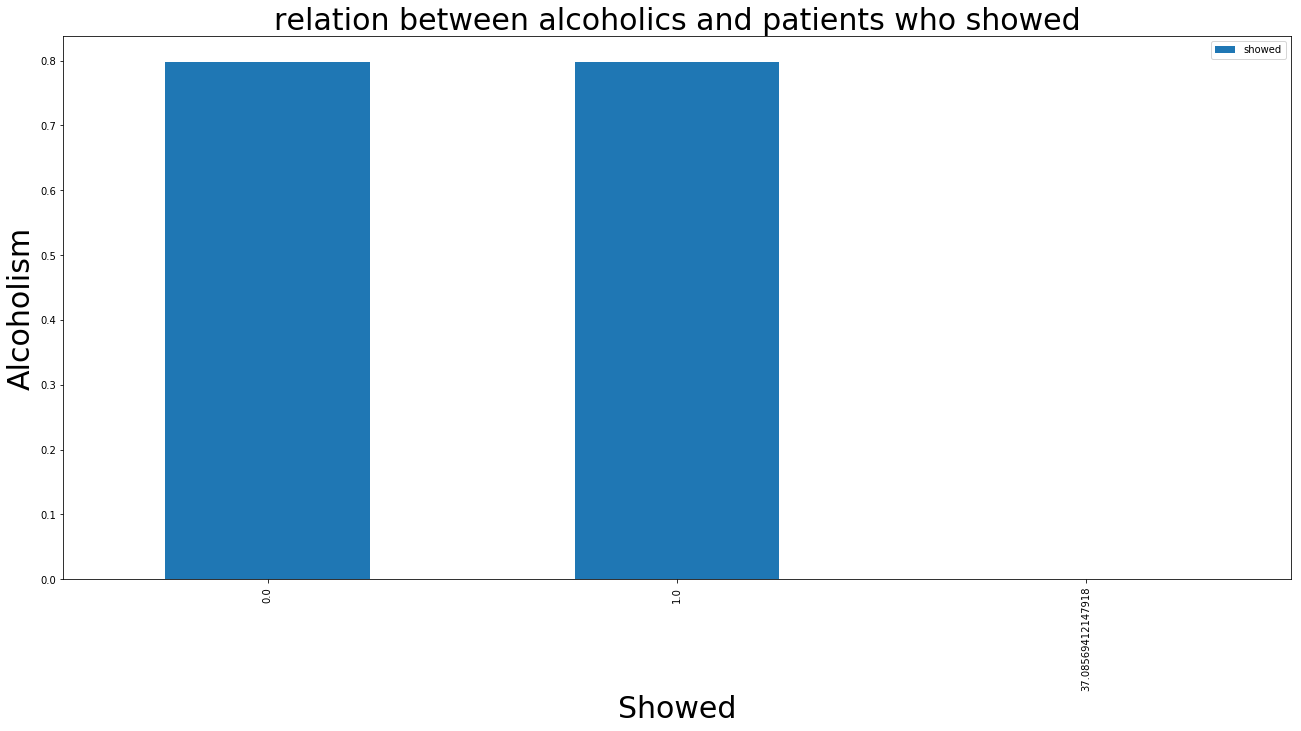

In [50]:
# using group by function to find relations between features
# and then see the relation between alcoholic people and people who showed up and who didn't
print(df.groupby('Alcoholism')['showed'].mean())
df.groupby('Alcoholism')['showed'].mean().plot(kind='bar',figsize=(22,10));
plt.xlabel("Showed",fontsize = 30)
plt.ylabel("Alcoholism", fontsize = 30)
plt.title("relation between alcoholics and patients who showed", fontsize = 30)
plt.legend()

SMS_received
0.000000     0.832744
1.000000     0.723340
37.085694    0.000000
Name: showed, dtype: float64


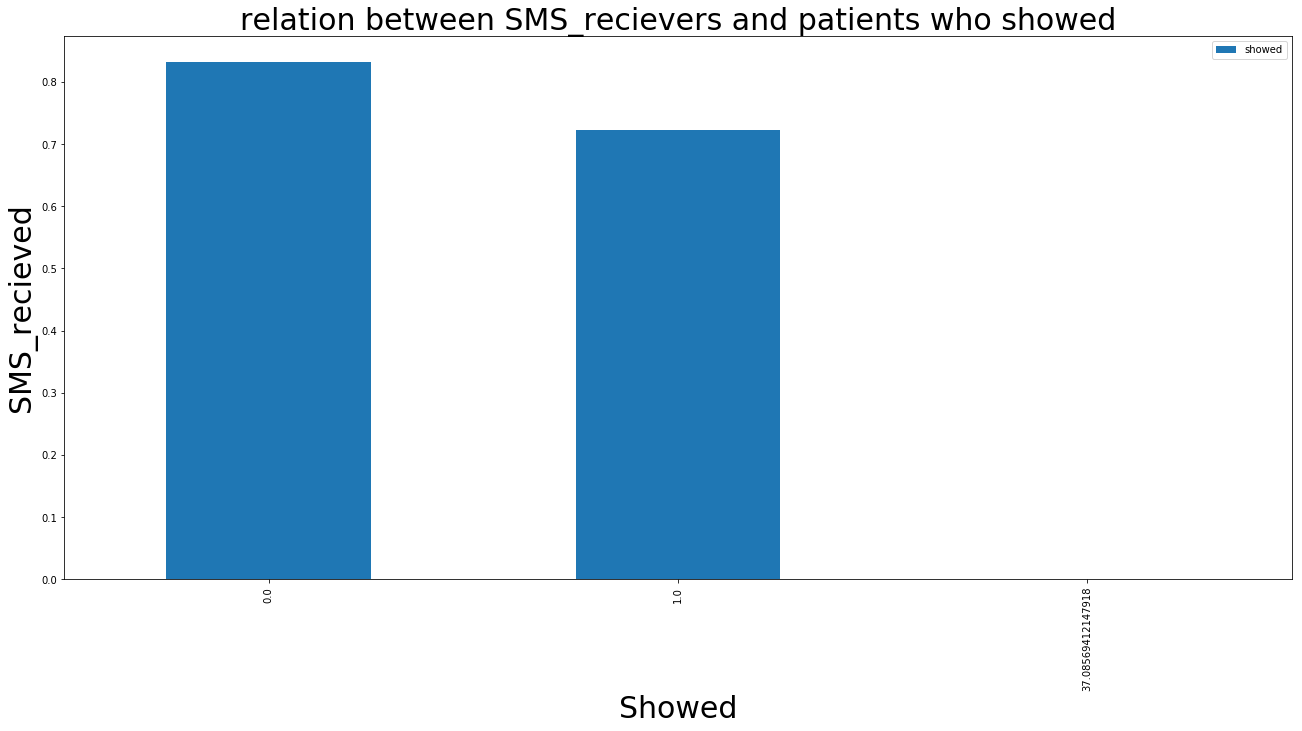

In [51]:
# using group by function to find relations between features
# and then see the relation between sms recievers and people who showed up and who didn't

print(df.groupby('SMS_received')['showed'].mean())
df.groupby('SMS_received')['showed'].mean().plot(kind='bar',figsize=(22,10));
plt.xlabel("Showed",fontsize = 30)
plt.ylabel("SMS_recieved",fontsize = 30)
plt.title("relation between SMS_recievers and patients who showed", fontsize = 30)
plt.legend()

Gender
37.08569412147918    0.000000
F                    0.796443
M                    0.799154
Name: showed, dtype: float64


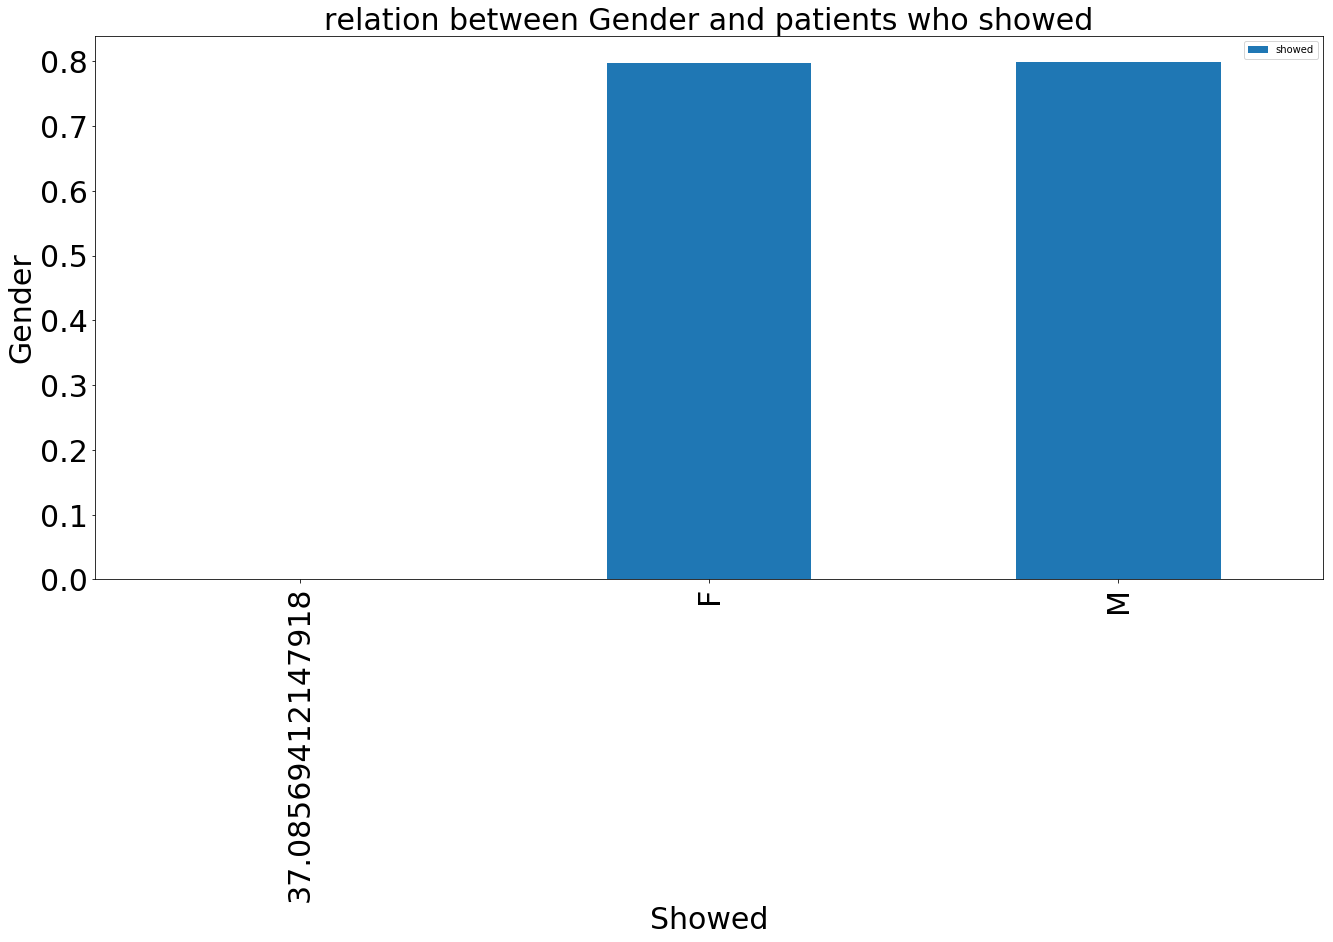

In [52]:
# using group by function to find relations between features
# and then see the relation between Gender and people who showed up and who didn't

print(df.groupby('Gender')['showed'].mean())
df.groupby('Gender')['showed'].mean().plot(kind='bar',figsize=(22,10),fontsize = 30);
plt.xlabel("Showed",fontsize = 30)
plt.ylabel("Gender",fontsize = 30)
plt.title("relation between Gender and patients who showed",fontsize = 30)
plt.legend()

In [53]:
df.Gender.value_counts()

F                    70113
M                    36869
37.08569412147918     3539
Name: Gender, dtype: int64

In [54]:
df.groupby('Gender')['SMS_received'].value_counts()

Gender             SMS_received
37.08569412147918  37.085694        3539
F                  0.000000        46357
                   1.000000        23756
M                  0.000000        26041
                   1.000000        10828
Name: SMS_received, dtype: int64

Scholarship
0.000000     0.801337
1.000000     0.762143
37.085694    0.000000
Name: showed, dtype: float64


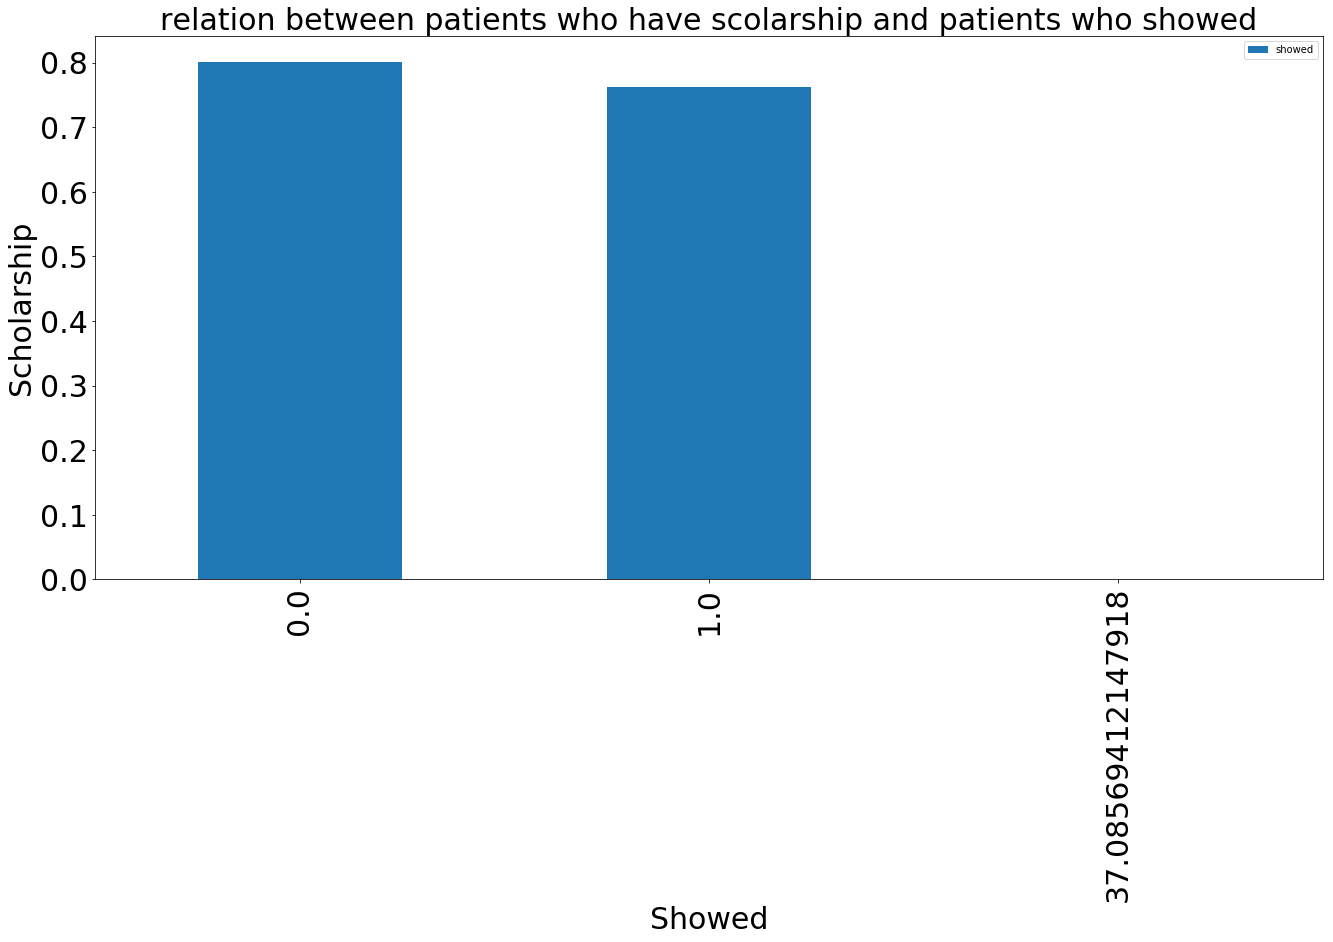

In [55]:
# using group by function to find relations between features
# and then see the relation between people who has scholarship and people who showed up and who didn't

print(df.groupby('Scholarship')['showed'].mean())
df.groupby('Scholarship')['showed'].mean().plot(kind = 'bar',figsize=(22,10), fontsize = 30)
plt.xlabel("Showed", fontsize = 30)
plt.ylabel("Scholarship", fontsize = 30)
plt.title("relation between patients who have scolarship and patients who showed", fontsize = 30)
plt.legend()

<a id='conclusions'></a>
## Conclusions
In conclusions, the age was the most important factor to patients' attendance. In details, people aged 39.07 were more likely to show up to the appt while the average age 35.32 were more not likely to show up for the appt. In additions, people who has scholarship were the most likely to miss the appt with a percentage of 76.2%. The gender or alcoholic is indifferent to the attendance rate. Female patients who received SMS were more likely to show up to the appt with the number 46361 and male with the number 26041. 

<a id='limitations'></a>
## Limitations
The limitations was that there were datas that had to be fixed such as 0 year old. These missing features can affect the data result, and also some helpful information such as patients employment status were missing.  

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295